In [3]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
from scipy import constants

#Import personal functions
import sys
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [10]:
Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Demo"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 9
Loading... Folder 1 of 1, Sample 2 of 9
Loading... Folder 1 of 1, Sample 3 of 9
Loading... Folder 1 of 1, Sample 4 of 9
Loading... Folder 1 of 1, Sample 5 of 9
Loading... Folder 1 of 1, Sample 6 of 9
Loading... Folder 1 of 1, Sample 7 of 9


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [36]:
data[1]['Samplename']

[19.822233264181374, 11.530714733805027]


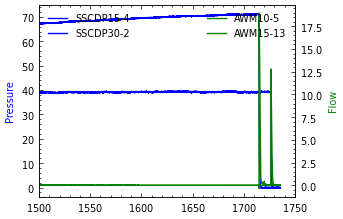

In [40]:
df = data[0][1]
time_column = 'Time'
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Flow', color='green')
ax1.set_ylabel('Pressure', color='blue')
V = []

# Iterate through each column (except the time column)
for column in df.columns:
    if column != time_column:
        if 'AWM' in column:
            # Plot on right y-axis
            ax2.plot(df[time_column], df[column], label=column, color='green')
            V.append(np.trapz(df[column], df[time_column]))
        
        elif 'MPX' in column:
            continue 

        else:
            # Plot on left y-axis
            ax1.plot(df[time_column], df[column]/1000, label=column, color='blue')
ax1.set_xlim(1500,1750)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
print(V)

In [51]:
gradient = np.gradient(df['SSCDP15-4'], df['Time'])

# Find the index of the minimum value in the gradient
min_index = np.argmin(gradient)

# Retrieve the corresponding time
min_gradient_time = df['Time'].iloc[min_index]

print("Time of minimum gradient:", min_gradient_time)

Time of minimum gradient: 1714.985


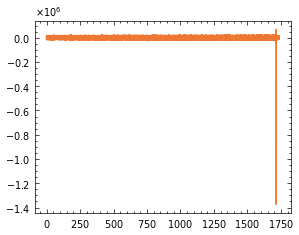

In [46]:
plt.plot(df['Time'], gradient)
#plt.ylim(-5,1)

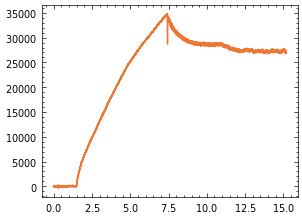

In [11]:
P = data[0][-1]["SSCDP15-4"]
t = data[0][-1]["Time"]/60
plt.plot(t,P)
